This notebook is intended to serve as a starting point for the first group project. The following code block imports libraries that are used.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

The following code block demonstrates how you can iterate over the data files.

In [2]:
data_file_folder = 'data'
data_files = [file for file in os.listdir(data_file_folder) if 'instance' in file]
for file in data_files:
    data_path = os.path.join(data_file_folder, file)
    pattern = re.compile('instance_(\d+).csv')
    instance_number = re.findall(pattern, file)[0]
    data = pd.read_csv(data_path)
    print(f'Instance {instance_number} (located at {data_path}) has {len(data)} jobs.')

Instance 1 (located at data\instance_1.csv) has 44 jobs.
Instance 10 (located at data\instance_10.csv) has 78 jobs.
Instance 11 (located at data\instance_11.csv) has 22 jobs.
Instance 12 (located at data\instance_12.csv) has 19 jobs.
Instance 13 (located at data\instance_13.csv) has 78 jobs.
Instance 14 (located at data\instance_14.csv) has 53 jobs.
Instance 15 (located at data\instance_15.csv) has 85 jobs.
Instance 16 (located at data\instance_16.csv) has 26 jobs.
Instance 17 (located at data\instance_17.csv) has 32 jobs.
Instance 18 (located at data\instance_18.csv) has 66 jobs.
Instance 19 (located at data\instance_19.csv) has 14 jobs.
Instance 2 (located at data\instance_2.csv) has 46 jobs.
Instance 20 (located at data\instance_20.csv) has 60 jobs.
Instance 21 (located at data\instance_21.csv) has 9 jobs.
Instance 22 (located at data\instance_22.csv) has 24 jobs.
Instance 23 (located at data\instance_23.csv) has 54 jobs.
Instance 24 (located at data\instance_24.csv) has 96 jobs.
In

The following code block specifies a particular data file and reads it into a Pandas DataFrame. The DataFrame is stored in the `data` object

In [3]:
current_file = data_files[29]
data_path = os.path.join(data_file_folder, current_file)
pattern = re.compile('instance_(\d+).csv')
instance_number = re.findall(pattern, current_file)[0]
data = pd.read_csv(data_path)
data = data.set_index('Job')
print(f'Instance {instance_number} has {len(data)} jobs.')
print('The first five rows of the data follow')
print(data.head())

Instance 9 has 5 jobs.
The first five rows of the data follow
     wj     pj  rj   dj
Job                    
1    50  21.32  81  155
2    50  18.63  88  150
3    13  15.02   4    6
4    14  20.18  64  111
5    22  17.07  53   77


The following code block defines the shortest processing time (SPT) dispatching rule function that we looked at in class.

In [4]:
def Apply_SPT_Vector(dataframe, start_time = 0, pj_column = 'pj', rj_column = 'rj'):
    '''
    This function computes the SPT schedule for a single machine instance with
    release dates. The function takes a Pandas DataFrame as an argument and a 
    start time for the schedule. The index of the DataFrame should by the job 
    number/name. The DataFrame should include columns for the processing time 
    and release date for each job. By default, the function assumes these data 
    are in columns named 'pj' and 'rj', respectively. If this assumption is not true,
    the correct columns names should be specified.
    
    The function returns a Pandas DataFrame with the schedule
    -------------------------------------------------------------------------------------
    '''

    unscheduled_jobs = dataframe.index.tolist()
    current_t = 0.0
    schedule = []

    while unscheduled_jobs:
        mask = (dataframe['rj'] <= current_t) & (dataframe.index.isin(unscheduled_jobs))
        if mask.sum() > 0:
            min_index = dataframe.loc[mask,'pj'].idxmin()
            finish_time = current_t + dataframe.loc[min_index,'pj']
            schedule.append([min_index, 
                             current_t, 
                             finish_time])
            unscheduled_jobs.remove(min_index)
            current_t = finish_time
        else:
            current_t = dataframe.loc[unscheduled_jobs,'rj'].min()

    return pd.DataFrame(schedule, columns = ['Job', 'Start', 'End']).set_index('Job')

The following code block applies the function to the `data` object.

In [5]:
Apply_SPT_Vector(data)

,Start,End
Job,,
3,4.00,19.02
5,53.00,70.07
4,70.07,90.25
2,90.25,108.88
1,108.88,130.20


The following code block defines a function that applies the longest processing time (LPT) dispatching rule. This rule schedules the available job, from the set of unscheduled jobs, with the longest processing time.

In [6]:
def Apply_LPT_Vector(dataframe, start_time = 0, pj_column = 'pj', rj_column = 'rj'):
    '''
    This function computes the LPT schedule for a single machine instance with
    release dates. The function takes a Pandas DataFrame as an argument and a 
    start time for the schedule. The index of the DataFrame should by the job 
    number/name. The DataFrame should include columns for the processing time 
    and release date for each job. By default, the function assumes these data 
    are in columns named 'pj' and 'rj', respectively. If this assumption is not true,
    the correct columns names should be specified.
    
    The function returns a Pandas DataFrame with the schedule
    -------------------------------------------------------------------------------------
    '''

    unscheduled_jobs = dataframe.index.tolist()
    current_t = 0.0
    schedule = []

    while unscheduled_jobs:
        mask = (dataframe['rj'] <= current_t) & (dataframe.index.isin(unscheduled_jobs))
        if mask.sum() > 0:
            max_index = dataframe.loc[mask,'pj'].idxmax()
            finish_time = current_t + dataframe.loc[max_index,'pj']
            schedule.append([max_index, 
                             current_t, 
                             finish_time])
            unscheduled_jobs.remove(max_index)
            current_t = finish_time
        else:
            current_t = dataframe.loc[unscheduled_jobs,'rj'].min()

    return pd.DataFrame(schedule, columns = ['Job', 'Start', 'End']).set_index('Job')

The following code block applies the function to the `data` object.

In [7]:
Apply_LPT_Vector(data)

,Start,End
Job,,
3,4.00,19.02
5,53.00,70.07
4,70.07,90.25
1,90.25,111.57
2,111.57,130.20


The following code block stores the LPT solution in an object named `schedule`.

In [8]:
schedule = Apply_LPT_Vector(data)
schedule

,Start,End
Job,,
3,4.00,19.02
5,53.00,70.07
4,70.07,90.25
1,90.25,111.57
2,111.57,130.20


The following code block computes the sum of the completion times for a schedule.

In [9]:
def Compute_Sum_of_Completion_Times(schedule, cj_column = 'End'):
    '''
    This function computes the sum of the completion times for a schedule provided
    as a Pandas DataFrame. The index of the schedule DataFrame should by the job 
    number/name. The DataFrame should include a column with the completion time (cj)
    for each job. By default, the function assumes the completion times are in a
    column named 'End'. If this assumption is not true,
    the correct columns names should be specified.
    
    The function returns the sum of the completion times
    -------------------------------------------------------------------------------------
    '''
    return schedule[cj_column].sum()

The following code block joins the `schedule` object with the `data` object, overwriting the `schedule` object.

In [10]:
schedule = data.join(schedule)
schedule

,wj,pj,rj,dj,Start,End
Job,,,,,,
1,50,21.32,81,155,90.25,111.57
2,50,18.63,88,150,111.57,130.20
3,13,15.02,4,6,4.00,19.02
4,14,20.18,64,111,70.07,90.25
5,22,17.07,53,77,53.00,70.07


We use the modified `schedule` object to test the `Compute_Sum_of_Completion_Times` function.

In [11]:
Compute_Sum_of_Completion_Times(schedule)

421.10999999999996

The following code block computes the maximum lateness for a schedule.

In [12]:
def Compute_Maximum_Lateness(schedule, cj_column = 'End', dj_column = 'dj'):
    '''
    This function computes the maximum lateness for a schedule provided
    as a Pandas DataFrame. The index of the schedule DataFrame should by the job 
    number/name. The DataFrame should include a column with the completion time
    for each job. By default, the function assumes the completion times are in a
    column named 'End'. If this assumption is not true,
    the correct columns names should be specified.
    
    The function returns the sum of the completion times
    -------------------------------------------------------------------------------------
    '''
    return (schedule[cj_column] - schedule[dj_column]).max()

We use the modified `schedule` object to test the `Compute_Maximum_Lateness` function.

In [13]:
Compute_Maximum_Lateness(schedule)

13.02

The following code block uses the previously defined functions to define a general dispatching rule function. The function allows a user to specify a valid dispatching rule and the job data. The function returns a tuple containg the sum of completion times and maximum lateness associated with applying the specified dispatching rule to the data.

In [14]:
def Apply_Basic_Dispatch_Rule(data, 
                              rule = 'SPT', 
                              pj_column = 'pj', 
                              rj_column = 'rj'):
    
    schedule = None
    if rule == 'SPT':
        schedule = Apply_SPT_Vector(data, pj_column = pj_column, rj_column = rj_column)
    elif rule == 'LPT':
        schedule = Apply_LPT_Vector(data, pj_column = pj_column, rj_column = rj_column)
    else:
        print('Invalid rule specified!!!')

    if schedule  is not None:
        schedule = data.join(schedule)
        sum_Cj = Compute_Sum_of_Completion_Times(schedule)
        L_max = Compute_Maximum_Lateness(schedule)
        
        return sum_Cj, L_max

The following code block demonstrates the functions use.

In [15]:
Apply_Basic_Dispatch_Rule(data)

(418.41999999999996, 13.02)

The following code block shows how we can save the performance measures.

In [16]:
sum_Cj, L_max = Apply_Basic_Dispatch_Rule(data)

The following code block loops over all of the data files, applying both valid dispatching rules to each instance and storing the associated performance measures in a list. The list is used to construct a Pandas DataFrame object named `all_results`.

In [17]:
data_file_folder = 'data'
data_files = [file for file in os.listdir(data_file_folder) if 'instance' in file]

all_results = []
for file in data_files:
    data_path = os.path.join(data_file_folder, file)
    pattern = re.compile('instance_(\d+).csv')
    instance_number = int(re.findall(pattern, file)[0])
    data = pd.read_csv(data_path)
    jobs = len(data)
    for current_rule in ['SPT', 'LPT']:
        sum_Cj, L_max = Apply_Basic_Dispatch_Rule(data, rule = current_rule)
        all_results.append([instance_number, jobs, current_rule, sum_Cj, L_max])
all_results = pd.DataFrame(all_results, columns = ['Instance', 'Jobs', 'Rule', 'Sum_Cj', 'Lmax'])
all_results = all_results.sort_values(by = ['Instance', 'Rule'])

The following code block shows how we can use the experimental results to make general observations regarding the performance of the dispatching rules.

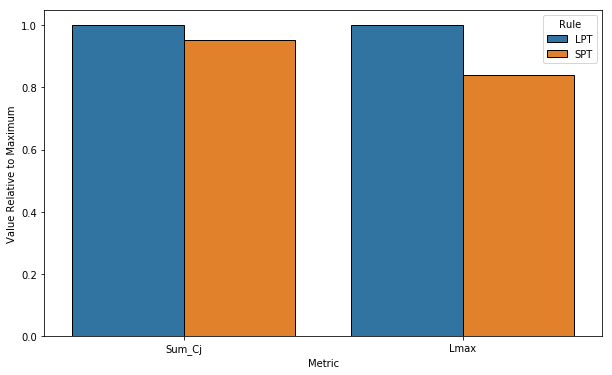

In [18]:
grouped = all_results.groupby('Rule')[['Sum_Cj', 'Lmax']].mean()
grouped = grouped/grouped.max()
grouped = grouped.stack().reset_index().rename(columns={'level_1':'Metric', 0: 'Value'})

fig, ax = plt.subplots(1,1,figsize = (10, 6))

sns.barplot(x="Metric", 
            y="Value", 
            hue="Rule", 
            data=grouped,
            edgecolor = 'k'
           )
ax.set_ylabel('Value Relative to Maximum')
plt.show()